# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [2]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_ks_threshold import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from optimum_clusters_DBSCAN import *
from optimum_clusters_SC import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_angle_max import *
from get_angle_sum import *


from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) Evaluation
from get_lognorm_fit import *
from evaluate_maxedge import *
from evaluate_maxedge_fast import *
from evaluate_alledge import *
from evaluate_byclass import *

#6) regression
from get_features import *

from regression_dataloader import *
from regression_dataloader_nofit import *
from regression_dataloader_square import *
from regressor_pointtest import *
from regressor_nsimilar import *

from evaluate_nsimilar import *


print("done")

done


In [3]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


# 2) Calculate regression variables
- Output = KS 
- Input = spatial feature diff


## 2a) Compare raw KS vs fitted KS

In [4]:
fit_tsc = get_lognorm_fit(df_tsc_merge,filename = "tsc_map.yaml",metric = "difference")
fit_tsc = fit_tsc.sort_values("n_obs", ascending = False).reset_index(drop = True)


0 edges: 0.698932409286499 secs
20 edges: 7.6661741733551025 secs
40 edges: 14.398962020874023 secs
60 edges: 24.34121823310852 secs
80 edges: 28.43280792236328 secs
100 edges: 32.23947620391846 secs
120 edges: 37.52491116523743 secs
140 edges: 42.638920307159424 secs
160 edges: 49.3618905544281 secs
180 edges: 53.60821342468262 secs
200 edges: 70.39974236488342 secs
220 edges: 79.74109721183777 secs
240 edges: 85.50716090202332 secs
Time taken (get_lognorm_fit): 87.13418793678284 secs
5000 iterations: 26.82201838493347 secs
10000 iterations: 42.294896602630615 secs
15000 iterations: 57.05971026420593 secs
20000 iterations: 66.96153473854065 secs
25000 iterations: 74.46974635124207 secs
30000 iterations: 80.39212560653687 secs
Time taken (regression_dataloader): 83.487233877182 secs


,edge1,edge2,n_obs1,n_obs2,ks_raw,ks_fitted,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,0.575176,0.917853,1,1,2,0.038271,1.67815
8732,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,0,0.464493,0,1,1,0.038271,2.0553


In [31]:
df_ks_diff_tsc_fitted = regression_dataloader(df_tsc_merge, fit_tsc, filename = "tsc_map.yaml",metric = "difference",
                                              cutoff = 50, precision = 2, verbose = True, report_interval = 5000)
df_ks_diff_tsc_fitted.tail(2)

5000 iterations: 22.483952045440674 secs
10000 iterations: 35.92532157897949 secs
15000 iterations: 46.50917410850525 secs
20000 iterations: 54.79763889312744 secs
25000 iterations: 61.165626525878906 secs
30000 iterations: 65.31300520896912 secs
Time taken (regression_dataloader): 67.68498301506042 secs


,edge1,edge2,n_obs1,n_obs2,ks_raw,ks_fitted,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,0.575176,0.917853,1,1,2,0.038271,1.67815
8732,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,0,0.464493,0,1,1,0.038271,2.0553


In [48]:
df_ks_diff_tsc_filtered = df_ks_diff_tsc_fitted[np.abs(df_ks_diff_tsc_fitted["ks_raw"]-df_ks_diff_tsc_fitted["ks_fitted"]) < 0.5]
print(len(df_ks_diff_tsc_filtered), len(df_ks_diff_tsc_fitted))
test.head(2)

5367 8733


,edge1,edge2,n_obs1,n_obs2,ks_raw,ks_fitted,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
0,SuppLocker5_SuppLocker7,SuppLocker13_SuppLocker14,502,354,0.474104,0.107484,1.57124,2,0,2,1.41429,1.41429
4,SuppLocker5_SuppLocker7,LockCorridor_CorpLockInside,502,256,0.921875,0.0284319,1.32251,0,0,0,0.922901,0.922901


Text(0.5, 1.0, 'Any correlation?')

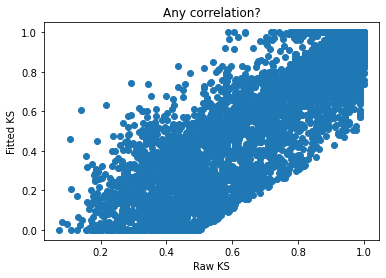

In [49]:
plt.scatter(df_ks_diff_tsc_filtered["ks_raw"],df_ks_diff_tsc_filtered["ks_fitted"])
plt.xlabel("Raw KS")
plt.ylabel("Fitted KS")
plt.title("Any correlation?")

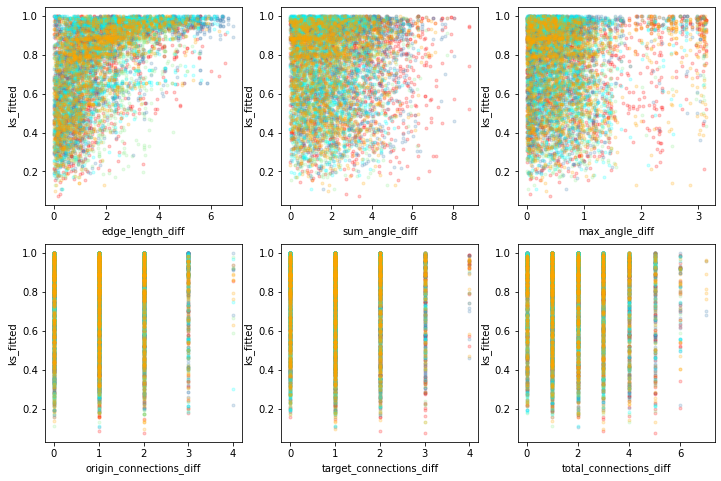

In [219]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

features = ["edge_length_diff","sum_angle_diff","max_angle_diff","origin_connections_diff","target_connections_diff","total_connections_diff"]

n_partition = 5
partition = len(df_ks_diff_tsc_fitted)//n_partition
colors = ["r","lightgreen","steelblue","cyan","orange","pink","yellow"]

for index,feature in enumerate(features):
    i = index // 3
    j = index % 3
    for k in range(n_partition):
        ax[i, j].scatter(df_ks_diff_tsc_fitted[feature][k*partition:(k+1)*partition], df_ks_diff_tsc_fitted["ks_raw"][k*partition:(k+1)*partition],marker = ".", color = colors[k], alpha = 0.2) #row=i, col=j
    ax[i, j].set_xlabel(feature)
    ax[i, j].set_ylabel("ks_fitted")


## 2b) Only using raw KS

In [5]:
#Dataloader
df_ks_diff_tsc = regression_dataloader_nofit(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_tsc.tail(2)

5000 iterations: 19.097036123275757 secs
10000 iterations: 30.255115032196045 secs
15000 iterations: 38.01097011566162 secs
20000 iterations: 44.368019342422485 secs
25000 iterations: 48.895344972610474 secs
30000 iterations: 52.080405712127686 secs
Time taken (regression_dataloader): 54.41834878921509 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,0.917853,1,1,2,0.038271,1.67815
8732,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,0.464493,0,1,1,0.038271,2.0553


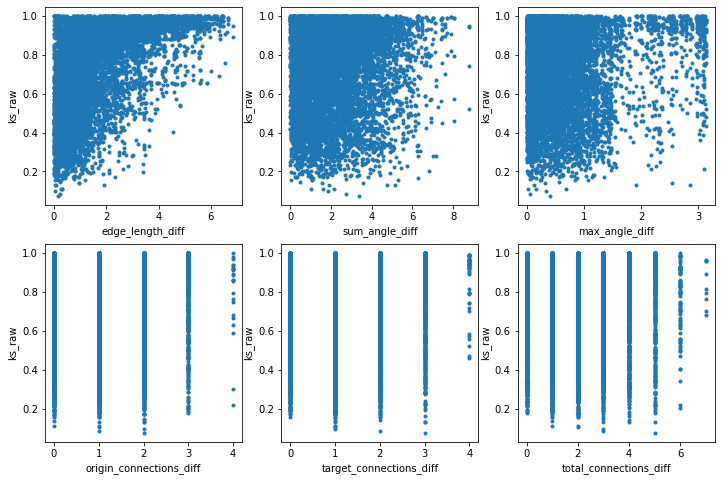

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

features = ["edge_length_diff","sum_angle_diff","max_angle_diff","origin_connections_diff","target_connections_diff","total_connections_diff"]
for index,feature in enumerate(features):
    i = index // 3
    j = index % 3
    ax[i, j].scatter(df_ks_diff_tsc[feature], df_ks_diff_tsc["ks"],marker = ".") #row=0, col=0
    ax[i, j].set_xlabel(feature)
    ax[i, j].set_ylabel("ks_raw")


## 2c) raw KS & sum of Square differences

In [6]:
#Dataloader
df_ks_diff_tsc_square = regression_dataloader_square(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_tsc_square.tail(2)

5000 iterations: 22.70354437828064 secs
10000 iterations: 35.67373061180115 secs
15000 iterations: 45.88483142852783 secs
20000 iterations: 53.9166316986084 secs
25000 iterations: 59.58128619194031 secs
30000 iterations: 63.40843605995178 secs
Time taken (regression_dataloader): 66.06203818321228 secs


,edge1,edge2,n_obs1,n_obs2,ks,square,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,0.000196364,0.917853,1,1,2,0.038271,1.67815
8732,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,0.00725313,0.464493,0,1,1,0.038271,2.0553


Text(0.5, 1.0, 'Any correlation?')

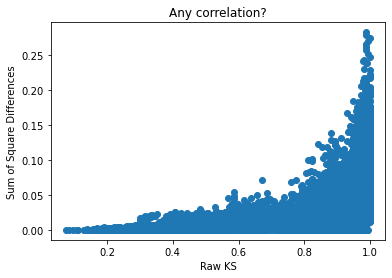

In [28]:
plt.scatter(df_ks_diff_tsc_square["ks"],df_ks_diff_tsc_square["square"])
plt.xlabel("Raw KS")
plt.ylabel("Sum of Square Differences")
plt.title("Any correlation?")
#plt.ylim([0,1])

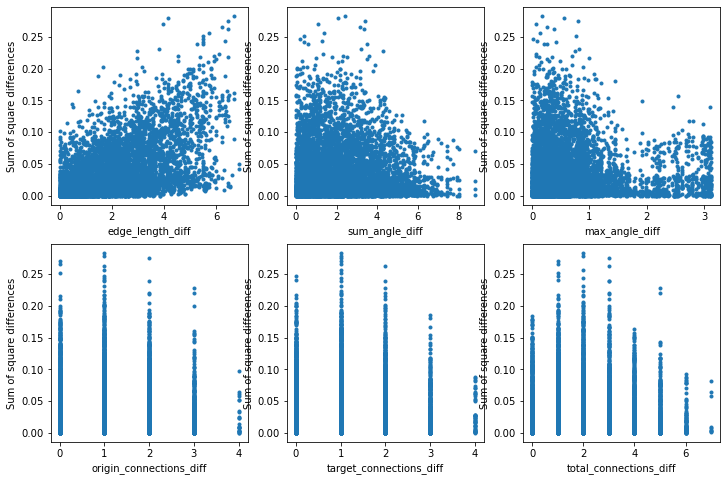

In [29]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

features = ["edge_length_diff","sum_angle_diff","max_angle_diff","origin_connections_diff","target_connections_diff","total_connections_diff"]
for index,feature in enumerate(features):
    i = index // 3
    j = index % 3
    ax[i, j].scatter(df_ks_diff_tsc_square[feature], df_ks_diff_tsc_square["square"],marker = ".") #row=0, col=0
    ax[i, j].set_xlabel(feature)
    ax[i, j].set_ylabel("Sum of square differences")


## 2d) All maps

In [7]:
#Dataloader
df_ks_diff_tsc = regression_dataloader_nofit(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_tsc = df_ks_diff_tsc.sample(frac=1).reset_index(drop=True)
df_ks_diff_tsc.tail(2)

5000 iterations: 21.01790976524353 secs
10000 iterations: 31.729475259780884 secs
15000 iterations: 39.993027687072754 secs
20000 iterations: 46.519651889801025 secs
25000 iterations: 51.29766035079956 secs
30000 iterations: 54.639235734939575 secs
Time taken (regression_dataloader): 56.914838790893555 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,Station_KitchenCounter1,ReceptionKitchen_ReceptionDesk,149,66,0.217002,0.818715,4,2,6,1.03107,5.43614
8732,CorpLocker5_CorpTransWP4,SuppLocker1_SuppLocker2,141,51,0.934084,3.78461,1,1,0,1.45255,2.60859


In [8]:
#Dataloader
df_ks_diff_aaf = regression_dataloader_nofit(df_aaf_merge, filename = "aaf_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_aaf.tail(2)

5000 iterations: 38.66754198074341 secs
10000 iterations: 57.624159812927246 secs
15000 iterations: 69.82884573936462 secs
Time taken (regression_dataloader): 94.21312642097473 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8994,WayPoint8_WayPoint87,Lift1_Teekueche,83,50,0.927711,2.43624,2,1,1,0.751287,1.44086
8995,WayPoint8_WayPoint87,WayPoint45_WayPoint82,83,50,0.795663,0.439063,0,0,0,0.846232,1.71891


In [9]:
#Dataloader
df_ks_diff_labs = regression_dataloader_nofit(df_labs_merge, filename = "labs_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_labs.tail(2)

Time taken (regression_dataloader): 1.0725505352020264 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
97,WayPoint1_WayPoint2,WayPoint5_WayPoint6,95,69,0.669718,7.36684,0,0,0,0.00426273,0.00426273
98,WayPoint1_WayPoint2,WayPoint7_WayPoint5,95,58,0.260617,0.23465,1,1,0,1.48508,3.08668


In [10]:
#Dataloader
df_ks_diff_walmart = regression_dataloader_nofit(df_walmart_merge, filename = "walmart_map.yaml",metric = "operation_time",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_walmart.tail(2)

5000 iterations: 17.22966480255127 secs
10000 iterations: 24.532246589660645 secs
15000 iterations: 29.790773153305054 secs
20000 iterations: 33.451756715774536 secs
Time taken (regression_dataloader): 34.96670937538147 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
4003,WayPoint94_WayPoint95,WayPoint95_WayPoint94,50,50,0.2,0,1,1,0,1.56893,0.00160914
4004,WayPoint107_WayPoint108,WayPoint95_WayPoint94,50,50,1,2.30827,1,0,1,3.86457e-05,3.86457e-05


In [11]:
#Dataloader
df_ks_diff_blenheim = regression_dataloader_nofit(df_blenheim_merge, filename = "blenheim_map.yaml",metric = "operation_time",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_blenheim.tail(2)

Time taken (regression_dataloader): 1.9166958332061768 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
115,WayPoint2_WayPoint12,WayPoint4_WayPoint7,549,93,0.25354,0.755528,1,0,1,0.00507651,0.00507651
116,WayPoint2_WayPoint12,WayPoint6_WayPoint9,549,93,0.108408,0.916397,1,0,1,0.0126917,0.0126917


In [12]:
#randomise
df_ks_diff_tsc = df_ks_diff_tsc.sample(frac=1).reset_index(drop=True)
df_ks_diff_aaf = df_ks_diff_aaf.sample(frac=1).reset_index(drop=True)
df_ks_diff_labs = df_ks_diff_labs.sample(frac=1).reset_index(drop=True)
df_ks_diff_walmart = df_ks_diff_walmart.sample(frac=1).reset_index(drop=True)
df_ks_diff_blenheim = df_ks_diff_blenheim.sample(frac=1).reset_index(drop=True)
print("randomisation completed")

randomisation completed


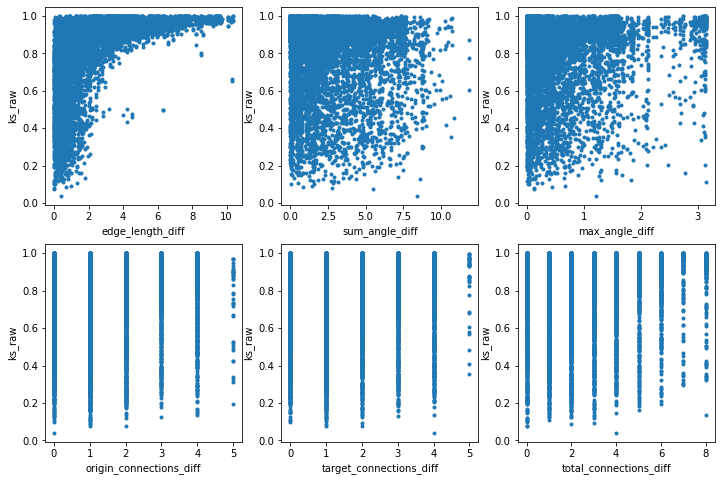

In [85]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

features = ["edge_length_diff","sum_angle_diff","max_angle_diff","origin_connections_diff","target_connections_diff","total_connections_diff"]
for index,feature in enumerate(features):
    i = index // 3
    j = index % 3
    ax[i, j].scatter(df_ks_diff_aaf[feature], df_ks_diff_aaf["ks"],marker = ".") #row=0, col=0
    ax[i, j].set_xlabel(feature)
    ax[i, j].set_ylabel("ks_raw")


# 3) Regression
- random forest is the best
- since MSE/MAE is lowest & predicted output falls most closely inot the interval 0-1 (rf gives lowest min value & max < 1)

In [73]:
cutoff = 8000
df_train = df_ks_diff_tsc[:cutoff]
df_test = df_ks_diff_tsc[cutoff:]
features = ["edge_length_diff", "origin_connections_diff", 
          "target_connections_diff", "total_connections_diff", 
          "max_angle_diff", "sum_angle_diff"]

print(len(df_train),len(df_test))

8000 733


## 3a) Point test

In [74]:
clf = regressor_pointtest(df_train, df_test,
            features = ["edge_length_diff", "origin_connections_diff", 
            "target_connections_diff", "total_connections_diff", 
            "max_angle_diff", "sum_angle_diff"], 
            target = "ks",
            classifier= "rf")

MSE: 0.03149999038485487
MAE: 0.13681816297686553
Max/min y_pred: 0.976352767000165 0.32951774915809495
Max/min y_test: 1.0 0.07495187857237316


## 3b) Lasso/Ridge Linear Regression

In [89]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
clf = RidgeCV(cv = 100)
y_train = np.array(df_train["ks"]).astype(float)
y_test = np.array(df_test["ks"]).astype(float)
X_train = np.array(df_train[features])
    
X_test = np.array(df_test[features])
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred[:10])
print(y_test[:10])
print("MSE:",np.sum(np.square(y_pred-y_test))/len(y_pred))
print("MAE:",np.sum(np.abs(y_pred-y_test))/len(y_pred))
print("Max/min y_pred:", np.max(y_pred), np.min(y_pred))
print("Max/min y_test:", np.max(y_test), np.min(y_test))

[0.71847583 0.8284865  0.78521687 0.9441422  0.69472177 0.84303837
 0.78672424 0.76563099 0.8758379  0.77791745]
[0.42564103 0.86211878 0.86363636 0.96218487 0.85447885 0.92332268
 0.58544049 0.86204622 0.95454545 0.95953611]
MSE: 0.02544637997844421
MAE: 0.11959240374584096
Max/min y_pred: 1.219727638325649 0.6059854357071293
Max/min y_test: 1.0 0.07607478435238735


## 3c) SVM Regression

In [112]:
from sklearn.svm import SVR

clf = SVR(kernel = "rbf", C = 3, epsilon = 0.01)
y_train = np.array(df_train["ks"]).astype(float)
y_test = np.array(df_test["ks"]).astype(float)
X_train = np.array(df_train[features])
    
X_test = np.array(df_test[features])
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred[:10])
print(y_test[:10])
print("MSE:",np.sum(np.square(y_pred-y_test))/len(y_pred))
print("MAE:",np.sum(np.abs(y_pred-y_test))/len(y_pred))
print("Max/min y_pred:", np.max(y_pred), np.min(y_pred))
print("Max/min y_test:", np.max(y_test), np.min(y_test))

[0.64652391 0.92644894 0.87993968 0.94869356 0.60579171 0.92455267
 0.86739165 0.88449313 0.92617385 0.83859952]
[0.42564103 0.86211878 0.86363636 0.96218487 0.85447885 0.92332268
 0.58544049 0.86204622 0.95454545 0.95953611]
MSE: 0.022034206851607015
MAE: 0.09312445830107571
Max/min y_pred: 1.005283269814846 0.36735406984398633
Max/min y_test: 1.0 0.07607478435238735


<BarContainer object of 4 artists>

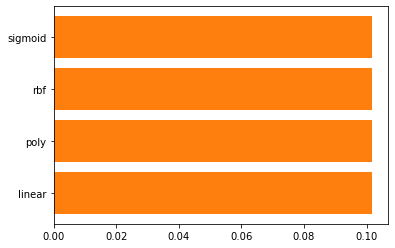

In [91]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
mse = []
mae = []
for kernel in kernels:
    clf = SVR(kernel = "rbf", C = 1, epsilon = 0.1)
    y_train = np.array(df_train["ks"]).astype(float)
    y_test = np.array(df_test["ks"]).astype(float)
    X_train = np.array(df_train[features])

    X_test = np.array(df_test[features])
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)


    mse.append(np.sum(np.square(y_pred-y_test))/len(y_pred))
    mae.append(np.sum(np.abs(y_pred-y_test))/len(y_pred))

plt.barh(kernels,mae)

## 3d) Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 100)
y_train = np.array(df_train["ks"]).astype(float)
y_test = np.array(df_test["ks"]).astype(float)
X_train = np.array(df_train[features])
    
X_test = np.array(df_test[features])
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred[:10])
print(y_test[:10])
print("MSE:",np.sum(np.square(y_pred-y_test))/len(y_pred))
print("MAE:",np.sum(np.abs(y_pred-y_test))/len(y_pred))
print("Max/min y_pred:", np.max(y_pred), np.min(y_pred))
print("Max/min y_test:", np.max(y_test), np.min(y_test))

[0.42483038 0.86225264 0.79899379 0.96093503 0.6815417  0.89656514
 0.77581012 0.88896688 0.92012349 0.85805486]
[0.42564103 0.86211878 0.86363636 0.96218487 0.85447885 0.92332268
 0.58544049 0.86204622 0.95454545 0.95953611]
MSE: 0.01637480406350609
MAE: 0.08081398334009866
Max/min y_pred: 0.996079440872184 0.28987956382373686
Max/min y_test: 1.0 0.07607478435238735


## 3e) AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.01)
y_train = np.array(df_train["ks"]).astype(float)
y_test = np.array(df_test["ks"]).astype(float)
X_train = np.array(df_train[features])
X_test = np.array(df_test[features])
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred[:10])
print(y_test[:10])
print("MSE:",np.sum(np.square(y_pred-y_test))/len(y_pred))
print("MAE:",np.sum(np.abs(y_pred-y_test))/len(y_pred))
print("Max/min y_pred:", np.max(y_pred), np.min(y_pred))
print("Max/min y_test:", np.max(y_test), np.min(y_test))

[0.58143914 0.90560944 0.80091478 0.95075967 0.64610228 0.92102716
 0.84405804 0.83691293 0.91685862 0.79312626]
[0.42564103 0.86211878 0.86363636 0.96218487 0.85447885 0.92332268
 0.58544049 0.86204622 0.95454545 0.95953611]
MSE: 0.020974363657573096
MAE: 0.1007935260083982
Max/min y_pred: 0.950991303536608 0.5773958715123949
Max/min y_test: 1.0 0.07607478435238735


# 4) Generalisation Step
- get context of all previously seen edges
- for a new edge, calculate feature difference & use regressor to predict KS
- Select k seen edges with lowest KS for generalisation
- Compare to edges with lowest length difference & actual KS difference

In [62]:
df_features_aaf = get_features(filename = "aaf_map.yaml")
df_features_tsc = get_features(filename = "tsc_map.yaml")
df_features_labs = get_features(filename = "labs_map.yaml")
df_features_walmart = get_features(filename = "walmart_map.yaml")
df_features_blenheim = get_features(filename = "blenheim_map.yaml")

Time taken (get_features): 5.017475366592407 secs
Time taken (get_features): 5.04721474647522 secs
Time taken (get_features): 0.5106582641601562 secs
Time taken (get_features): 6.343263387680054 secs
Time taken (get_features): 0.6051187515258789 secs


In [75]:
df_similar_aaf = regressor_nsimilar(clf,df_features_seen=df_features_tsc,
                                   df_features_unseen=df_features_aaf,
                                   n_similar = 5,
                                   features = ["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"])
df_similar_tsc.head(2)

0 edges: 0.0019943714141845703 secs
25 edges: 5.764463901519775 secs
50 edges: 11.577818155288696 secs
75 edges: 17.35065269470215 secs
100 edges: 23.087931394577026 secs
125 edges: 28.90057134628296 secs
150 edges: 34.677958965301514 secs
175 edges: 40.477275371551514 secs
200 edges: 46.27084517478943 secs
Time taken (regressor_nsimilar): 50.84597587585449 secs


,edge_id,similar_edge,similar_ks,all_edge,all_ks
0,Ambulanz_WayPoint9,"[SuppLocker13_SuppLocker2, SuppLocker1_SuppLoc...","[0.38099568125049804, 0.29693299594033357, 0.3...","[ChargingPoint_Station, ChargingPoint1_Station...","[0.946864128668253, 0.9037037023990456, 0.8972..."
1,Ambulanz_WayPoint67,"[NewNode0_LearningTable1, SuppMeetingPod2_Supp...","[0.23078463541144725, 0.24671013626267638, 0.2...","[ChargingPoint_Station, ChargingPoint1_Station...","[0.8622413698927492, 0.772023626227041, 0.7998..."


# 5) Evaluate

## 5a) Raw KS score

In [76]:
mean_ks,mae,mse = evaluate_nsimilar(df_similar_tsc,
                                    df_seen = df_tsc_merge,
                                    df_unseen = df_aaf_merge,
                                    cutoff = 20,
                                    metric = "difference")

0 edges: 0.0 secs
25 edges: 0.2767970561981201 secs
50 edges: 0.576531171798706 secs
75 edges: 0.7730343341827393 secs
100 edges: 1.007509469985962 secs
125 edges: 1.2768199443817139 secs
150 edges: 1.5091991424560547 secs
175 edges: 1.7685415744781494 secs
200 edges: 2.046354293823242 secs
Time taken (evaluate_nsimilar): 2.297682046890259 secs
Mean KS: 0.686287032352278
MAE: 0.4383346251383209
MSE: 0.23748994828554876


## 5b) Fitted KS scores